In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

In [4]:
Avocado = pd.read_csv(r'C:\Users\ENVY\OneDrive\Documents\avocado.csv')
Avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
Avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [6]:
Avocado.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [7]:
Avocado.isnull().sum().sum()

209314

In [19]:
Avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

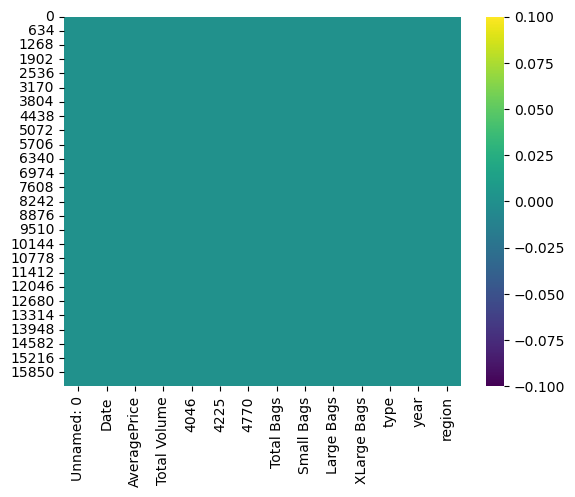

In [20]:
# Check if there is any missing value

sns.heatmap(Avocado.isnull(), cmap='viridis')
plt.show()

In [ ]:
# Define the features and label
features = ['Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region']
output = ['region', 'AveragePrice']

X, y = Avocado[features].values, Avocado[output].values

feat_cols = Avocado.columns
feature_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('preprocess', feature_transformer, feat_cols)])

# Different classifiers
classifiers = [
    LogisticRegression(C=1/0.01, solver='saga', multi_class='auto', max_iter=800),
    SVC(probability=True),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(max_features='auto'),
    GradientBoostingClassifier(max_features='auto')
]

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Check the distribution of classes in y
unique_classes, class_counts = np.unique(y, return_counts=True)

# Find the class with only one member
single_member_classes = unique_classes[class_counts == 1]

# Resample to ensure each class has at least two instances
for class_label in single_member_classes:
    # Find indices of the single-member class
    single_member_indices = np.where(y == class_label)[0]

    # Upsample the single-member class to have at least two instances
    y_resampled = resample([class_label] * 2, replace=True, n_samples=len(single_member_indices), random_state=42)

    # Replace the single-member class with the resampled data
    y.iloc[single_member_indices] = y_resampled

# Fit different classifiers and evaluate performance
for clf in classifiers:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('clf', clf)])
    
    # Fit the model using resampled y
    model = pipeline.fit(xtrain, ytrain)
    
    # Predict using xtest
    ympred = model.predict(xtest)
    
    # Print classifier details
    print(f"\n{clf.__class__.__name__}:")

In [ ]:
# Classification Report
print(classification_report(ytest, ympred))

In [ ]:
classifiers=[]

svm = SVC(probability=True)
classifiers.append(svm)

rf = RandomForestClassifier(n_estimators=100)
classifiers.append(rf)

knn = KNeighborsClassifier(n_neighbors=5)
classifiers.append(knn)

dt = DecisionTreeClassifier(max_features='auto')
classifiers.append(dt)

gbc = GradientBoostingClassifier(max_features= 'auto')
classifiers.append(gbc
                  )
feat_cols = [1,2,3,4,5,6,7,8]
feature_transformer = Pipeline( steps = [('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers= [('preprocess', feature_transformer, feat_cols)])

for clf in classifiers:
    pipeline= Pipeline(steps=[ ('preprocessor', preprocessor), ('clf', clf) ])
    model=pipeline.fit(xtrain, ytrain)
    ympred= model.predict(xtest)
    print(clf)
    print("Overall Accuracy:",accuracy_score(ytest, ympred))
    print("Overall Precision:",precision_score(ytest, ympred, average='macro'))
    print("Overall Recall:",recall_score(ytest, ympred, average='macro'))
    print("\n")

In [ ]:
# Overall Accuracy, Precision, and Recall
print("Overall Accuracy:", accuracy_score(ytest, ympred))
print("Overall Precision:", precision_score(ytest, ympred, average='macro'))
print("Overall Recall:", recall_score(ytest, ympred, average='macro'))

In [ ]:
# Confusion Matrix
mcm = confusion_matrix(ytest, ympred)
print("Confusion Matrix:")
print(mcm)